In [1]:
%cd libraries
import LOTlib3

/Users/meilongzhang/knightlab/codet5/libraries


In [2]:
import os
print(os.getcwd())

/Users/meilongzhang/knightlab/codet5/libraries


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
from random import sample
from random import randrange
from random import choices

In [7]:
import json

In [8]:
from LOTlib3.Hypotheses.LOTHypothesis import LOTHypothesis
from LOTlib3.DataAndObjects import FunctionData, Obj

In [9]:
from LOTlib3.DefaultGrammars import DNF
from LOTlib3.Miscellaneous import q, random
from LOTlib3.Grammar import Grammar

In [10]:
from LOTlib3.Hypotheses import FunctionHypothesis, Hypothesis

In [11]:
from LOTlib3.Samplers.MetropolisHastings import MetropolisHastingsSampler
from LOTlib3 import break_ctrlc
from LOTlib3.Miscellaneous import qq
from LOTlib3.TopN import TopN

In [13]:
from LOTlib3.Hypotheses.Priors.RationalRules import RationaRulesPrior
from LOTlib3.Hypotheses.Likelihoods.BinaryLikelihood import BinaryLikelihood
from LOTlib3.Examples.RationalRules.Model import MyHypothesis

In [713]:
DEFAULT_FEATURE_WEIGHT = 5
grammar = Grammar()
grammar.add_rule('START', '', ['DISJ'], 1.0)
grammar.add_rule('START', '', ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('START', 'True', None, DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('START', 'False', None, DEFAULT_FEATURE_WEIGHT)

grammar.add_rule('DISJ', '',     ['CONJ'], 1.0)
grammar.add_rule('DISJ', '',     ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('DISJ', '(%s or %s)',  ['PRE-PREDICATE', 'DISJ'], 1.0)

grammar.add_rule('CONJ', '',     ['PRE-PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('CONJ', '(%s and %s)', ['PRE-PREDICATE', 'CONJ'], 1.0)

# A pre-predicate is how we treat negation
grammar.add_rule('PRE-PREDICATE', '(not (%s))', ['PREDICATE'], DEFAULT_FEATURE_WEIGHT)
grammar.add_rule('PRE-PREDICATE', '',     ['PREDICATE'], DEFAULT_FEATURE_WEIGHT)

PRE-PREDICATE -> ['PREDICATE']	w/ p=5.0

In [714]:
#grammar.add_rule('PREDICATE', 'is_color_', ['x', 'COLOR'], 1.0)
#grammar.add_rule('PREDICATE', 'is_shape_', ['x', 'SHAPE'], 1.0)
grammar.add_rule('PREDICATE', "x['color'] == %s", ['COLOR'], 1.0)
grammar.add_rule('PREDICATE', "x['shape'] == %s", ['SHAPE'], 1.0)

# Some colors/shapes each (for this simple demo)
# These are written in quotes so they can be evaled
grammar.add_rule('COLOR', q('red'), None, 1.0)
grammar.add_rule('COLOR', q('blue'), None, 1.0)
grammar.add_rule('COLOR', q('green'), None, 1.0)


grammar.add_rule('SHAPE', q('square'), None, 1.0)
grammar.add_rule('SHAPE', q('circle'), None, 1.0)
grammar.add_rule('SHAPE', q('triangle'), None, 1.0)

SHAPE -> 'triangle'	w/ p=1.0

In [715]:
rules = {i: set() for i in range(15)}
for _ in range(100000):
    #rule = grammar.generate()
    #log_prob = grammar.log_probability(rule)
    rule = LOTHypothesis(grammar=grammar)
    depth = rule.value.depth() #rule.depth()
    rules[depth].add(rule)

In [716]:
rules = {depth: list(depth_rules) for depth, depth_rules in rules.items()}

In [717]:
colors = ['red', 'blue', 'green']
shapes = ['circle', 'square', 'triangle']
all_stimuli = []

for color in colors:
    for shape in shapes:
        all_stimuli.append({'shape':shape, 'color':color})

In [718]:
all_stimuli

[{'shape': 'circle', 'color': 'red'},
 {'shape': 'square', 'color': 'red'},
 {'shape': 'triangle', 'color': 'red'},
 {'shape': 'circle', 'color': 'blue'},
 {'shape': 'square', 'color': 'blue'},
 {'shape': 'triangle', 'color': 'blue'},
 {'shape': 'circle', 'color': 'green'},
 {'shape': 'square', 'color': 'green'},
 {'shape': 'triangle', 'color': 'green'}]

# Diverse Prompt Generation

In [719]:
import itertools

In [720]:
l = [True, False]
all_results = [list(i) for i in itertools.product(l, repeat=9)]
all_results

[[True, True, True, True, True, True, True, True, True],
 [True, True, True, True, True, True, True, True, False],
 [True, True, True, True, True, True, True, False, True],
 [True, True, True, True, True, True, True, False, False],
 [True, True, True, True, True, True, False, True, True],
 [True, True, True, True, True, True, False, True, False],
 [True, True, True, True, True, True, False, False, True],
 [True, True, True, True, True, True, False, False, False],
 [True, True, True, True, True, False, True, True, True],
 [True, True, True, True, True, False, True, True, False],
 [True, True, True, True, True, False, True, False, True],
 [True, True, True, True, True, False, True, False, False],
 [True, True, True, True, True, False, False, True, True],
 [True, True, True, True, True, False, False, True, False],
 [True, True, True, True, True, False, False, False, True],
 [True, True, True, True, True, False, False, False, False],
 [True, True, True, True, False, True, True, True, True]

In [721]:
example_data = [FunctionData(input=[all_stimuli[i]], output=all_results[10][i], alpha=0.999) for i in range(9)]
example_data

[<{'shape': 'circle', 'color': 'red'} -> True>,
 <{'shape': 'square', 'color': 'red'} -> True>,
 <{'shape': 'triangle', 'color': 'red'} -> True>,
 <{'shape': 'circle', 'color': 'blue'} -> True>,
 <{'shape': 'square', 'color': 'blue'} -> True>,
 <{'shape': 'triangle', 'color': 'blue'} -> False>,
 <{'shape': 'circle', 'color': 'green'} -> True>,
 <{'shape': 'square', 'color': 'green'} -> False>,
 <{'shape': 'triangle', 'color': 'green'} -> True>]

In [722]:
class MyHypothesis(RationaRulesPrior, BinaryLikelihood, LOTHypothesis):
    def __init__(self, **kwargs):
        LOTHypothesis.__init__(self, grammar=grammar, **kwargs)
        self.rrAlpha=2.0

In [723]:
from contextlib import suppress

In [724]:
example_hypo = MyHypothesis()
example_top = TopN(N=10)
for h in (MetropolisHastingsSampler(example_hypo, example_data, steps=10000)):
    example_top << h

In [725]:
for h in example_top:
    print(h.posterior_score, h.prior, h.likelihood, qq(h))

-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['shape'] == 'square')) or ((not (x['shape'] == 'square')) or (not (x['color'] == 'green'))))"
-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['color'] == 'green')) or ((not (x['shape'] == 'square')) or (not (x['shape'] == 'square'))))"
-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['shape'] == 'square')) or ((not (x['color'] == 'green')) or (not (x['color'] == 'green'))))"
-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['shape'] == 'square')) or ((not (x['color'] == 'green')) or (not (x['shape'] == 'square'))))"
-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['color'] == 'green')) or ((not (x['shape'] == 'square')) or (not (x['color'] == 'green'))))"
-19.279947774322203 -11.675044314446662 -7.6049034598755405 "lambda x: ((not (x['color'] == 'green')) or ((not (x['color'] == 'green

In [726]:
posts = []
priors = []
likelihoods = []
codes = []
for h in example_top:
    posts.append(h.posterior_score)
    priors.append(h.prior)
    likelihoods.append(h.likelihood)
    codes.append(qq(h))

In [727]:
indices = [i for i in range(len(likelihoods)) if (likelihoods[i] == max(likelihoods))]

In [728]:
ex_c = codes[posts.index(max([posts[i] for i in indices]))]

In [729]:
ex_c

'"lambda x: ((not (x[\'color\'] == \'green\')) or (not (x[\'shape\'] == \'square\')))"'

In [730]:
exec(f"def classify(x): return {ex_c[11:len(ex_c)-1]}")

In [731]:
correct = 0
for i in range(len(all_stimuli)):
    correct += classify(all_stimuli[i]) == all_results[10][i]

In [732]:
correct

8

# Automated

In [733]:
with open('../data/revised_codex_prompts_2.json', 'w') as out:
    da = []
    for results in all_results:
    #for results in all_results:
        print(results)
        objs = [FunctionData(input=[all_stimuli[i]], output=results[i], alpha=0.999) for i in range(9)]
        hypo = MyHypothesis()
        top = TopN(N=10)
        print(f"sampling {all_results.index(results)}")
        for h in MetropolisHastingsSampler(hypo, objs, steps=10000):
            top << h
        
        """
        posts = []
        priors = []
        likelihoods = []
        codes = []
        for h in top:
            print(h.posterior_score, h.prior, h.likelihood, qq(h))
            posts.append(h.posterior_score)
            priors.append(h.prior)
            likelihoods.append(h.likelihood)
            codes.append(qq(h))
        
        indices = [i for i in range(len(likelihoods)) if (likelihoods[i] == max(likelihoods))]
        """
        codes = []
        posts = []
        priors = []
        likelihoods = []
        for h in top:
            codes.append(qq(h))
            posts.append(h.posterior_score)
            priors.append(h.prior)
            likelihoods.append(h.likelihood)
            
        corrects = []
        for code in codes:
            exec(f"def classify(x): return {code[11:len(code)-1]}")
            correct = 0
            for i in range(len(all_stimuli)):
                correct += classify(all_stimuli[i]) == results[i]
            corrects.append(correct)
        print(corrects)
            
        best_indices = [i for i in range(len(corrects)) if corrects[i] == max(corrects)]
        data = {}
        print(codes[posts.index(max([posts[i] for i in best_indices]))])
        best_index = posts.index(max([posts[i] for i in best_indices]))
        data["code"] = str(codes[best_index])
        data["accuracy"] = str(corrects[best_index] / 9)
        data["stims"] = str(all_stimuli)
        data["results"] = str(results)
        da.append(data)

    out.write(json.dumps(da))
out.close()

[True, True, True, True, True, True, True, True, True]
sampling 0
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
"lambda x: True"
[True, True, True, True, True, True, True, True, False]
sampling 1
[9, 9, 9, 9, 9, 9, 9, 8, 9, 9]
"lambda x: ((not (x['color'] == 'green')) or (not (x['shape'] == 'triangle')))"
[True, True, True, True, True, True, True, False, True]
sampling 2
[9, 9, 9, 9, 9, 9, 9, 9, 8, 9]
"lambda x: ((not (x['color'] == 'green')) or (not (x['shape'] == 'square')))"
[True, True, True, True, True, True, True, False, False]
sampling 3
[9, 9, 9, 9, 9, 8, 9, 9, 9, 9]
"lambda x: ((not (x['color'] == 'green')) or x['shape'] == 'circle')"
[True, True, True, True, True, True, False, True, True]
sampling 4
[9, 9, 9, 9, 9, 9, 9, 8, 9, 9]
"lambda x: ((not (x['color'] == 'green')) or (not (x['shape'] == 'circle')))"
[True, True, True, True, True, True, False, True, False]
sampling 5
[9, 9, 9, 9, 9, 8, 9, 9, 9, 9]
"lambda x: ((not (x['color'] == 'green')) or x['shape'] == 'square')"
[True, True, True,

[9, 9, 9, 9, 9, 8, 9, 9, 8, 8]
"lambda x: (x['color'] == 'red' or (x['shape'] == 'square' and x['color'] == 'blue'))"
[True, True, True, False, False, True, True, True, True]
sampling 48
[9, 9, 9, 9, 9, 9, 9, 8, 9, 9]
"lambda x: (x['shape'] == 'triangle' or (not (x['color'] == 'blue')))"
[True, True, True, False, False, True, True, True, False]
sampling 49
[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: (x['shape'] == 'triangle' or (not (x['color'] == 'blue')))"
[True, True, True, False, False, True, True, False, True]
sampling 50
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (x['shape'] == 'triangle' or x['color'] == 'red')"
[True, True, True, False, False, True, True, False, False]
sampling 51
[8, 8, 8, 8, 8, 8, 8, 8, 7, 7]
"lambda x: (x['color'] == 'red' or (x['shape'] == 'triangle' and x['color'] == 'blue'))"
[True, True, True, False, False, True, False, True, True]
sampling 52
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (x['shape'] == 'triangle' or x['color'] == 'red')"
[True, True, True, Fal

[8, 8, 8, 8, 8, 7, 8, 8, 8, 8]
"lambda x: ((not (x['color'] == 'red')) or (not (x['shape'] == 'triangle')))"
[True, True, False, False, True, True, True, True, False]
sampling 97
[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: (x['color'] == 'blue' or (not (x['shape'] == 'triangle')))"
[True, True, False, False, True, True, True, False, True]
sampling 98
[7, 7, 7, 7, 7, 7, 6, 7, 7, 7]
"lambda x: ((not (x['color'] == 'green')) or (not (x['shape'] == 'square')))"
[True, True, False, False, True, True, True, False, False]
sampling 99
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: (x['color'] == 'blue' or x['shape'] == 'circle')"
[True, True, False, False, True, True, False, True, True]
sampling 100
[8, 8, 8, 8, 8, 7, 8, 8, 8, 8]
"lambda x: ((not (x['shape'] == 'circle')) or x['color'] == 'red')"
[True, True, False, False, True, True, False, True, False]
sampling 101
[8, 8, 7, 7, 8, 8, 8, 7, 7, 7]
"lambda x: (x['shape'] == 'square' or (x['shape'] == 'square' or (x['color'] == 'red' and x['shape'] == 

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: (x['shape'] == 'triangle' or x['color'] == 'blue')"
[True, False, True, True, True, False, False, False, False]
sampling 143
[8, 8, 7, 8, 8, 8, 8, 7, 7, 7]
"lambda x: (x['color'] == 'blue' or ((not (x['shape'] == 'square')) and (not (x['color'] == 'green'))))"
[True, False, True, True, False, True, True, True, True]
sampling 144
[8, 9, 9, 9, 9, 8, 9, 9, 9, 9]
"lambda x: ((not (x['shape'] == 'square')) or x['color'] == 'green')"
[True, False, True, True, False, True, True, True, False]
sampling 145
[8, 8, 8, 8, 8, 8, 7, 8, 8, 8]
"lambda x: (x['color'] == 'green' or (not (x['shape'] == 'square')))"
[True, False, True, True, False, True, True, False, True]
sampling 146
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
"lambda x: (not (x['shape'] == 'square'))"
[True, False, True, True, False, True, True, False, False]
sampling 147
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (not (x['shape'] == 'square'))"
[True, False, True, True, False, True, False, True, True]
sampl

[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: ((not (x['shape'] == 'square')) and x['color'] == 'red')"
[True, False, True, False, False, False, False, False, True]
sampling 190
[8, 8, 7, 7, 8, 8, 8, 8, 8, 8]
"lambda x: ((not (x['color'] == 'blue')) and (not (x['shape'] == 'square')))"
[True, False, True, False, False, False, False, False, False]
sampling 191
[9, 9, 9, 9, 9, 9, 9, 8, 9, 9]
"lambda x: (x['color'] == 'red' and (not (x['shape'] == 'square')))"
[True, False, False, True, True, True, True, True, True]
sampling 192
[9, 9, 9, 9, 9, 8, 9, 9, 9, 9]
"lambda x: ((not (x['color'] == 'red')) or x['shape'] == 'circle')"
[True, False, False, True, True, True, True, True, False]
sampling 193
[9, 8, 8, 8, 8, 8, 8, 8, 9, 9]
"lambda x: (x['color'] == 'blue' or (x['shape'] == 'circle' or (x['shape'] == 'square' and x['color'] == 'green')))"
[True, False, False, True, True, True, True, False, True]
sampling 194
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (x['shape'] == 'circle' or x['color'] == 

[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: ((not (x['color'] == 'red')) and x['shape'] == 'square')"
[True, False, False, False, True, False, False, False, True]
sampling 238
[7, 7, 7, 7, 7, 7, 7, 7, 7, 6]
"lambda x: (x['color'] == 'red' and x['shape'] == 'circle')"
[True, False, False, False, True, False, False, False, False]
sampling 239
[8, 8, 8, 8, 8, 8, 8, 8, 8, 7]
"lambda x: (x['color'] == 'blue' and x['shape'] == 'square')"
[True, False, False, False, False, True, True, True, True]
sampling 240
[8, 8, 7, 8, 8, 8, 8, 7, 7, 7]
"lambda x: (x['color'] == 'green' or (x['color'] == 'green' or (x['shape'] == 'circle' and x['color'] == 'red')))"
[True, False, False, False, False, True, True, True, False]
sampling 241
[7, 7, 6, 6, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['shape'] == 'triangle')) and (not (x['color'] == 'blue')))"
[True, False, False, False, False, True, True, False, True]
sampling 242
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: (not (x['shape'] == 'square'))"
[True, False, Fal

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (x['shape'] == 'circle' or x['color'] == 'red')"
[False, True, True, True, False, False, False, True, True]
sampling 284
[7, 7, 7, 7, 6, 6, 7, 7, 7, 7]
"lambda x: ((not (x['shape'] == 'circle')) or x['color'] == 'blue')"
[False, True, True, True, False, False, False, True, False]
sampling 285
[7, 7, 6, 6, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['shape'] == 'circle')) and (not (x['color'] == 'blue')))"
[False, True, True, True, False, False, False, False, True]
sampling 286
[7, 7, 6, 6, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['color'] == 'blue')) and (not (x['shape'] == 'circle')))"
[False, True, True, True, False, False, False, False, False]
sampling 287
[8, 8, 8, 8, 8, 7, 8, 8, 7, 7]
"lambda x: (x['color'] == 'red' or (x['shape'] == 'circle' and x['color'] == 'blue'))"
[False, True, True, False, True, True, True, True, True]
sampling 288
[9, 9, 9, 9, 9, 9, 8, 9, 9, 9]
"lambda x: ((not (x['shape'] == 'circle')) or x['color'] == 'green')"
[False, Tr

[8, 7, 7, 8, 8, 8, 8, 7, 7, 7]
"lambda x: (x['shape'] == 'circle' or ((not (x['color'] == 'green')) and x['shape'] == 'square'))"
[False, True, False, True, True, False, False, True, True]
sampling 332
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: x['shape'] == 'square'"
[False, True, False, True, True, False, False, True, False]
sampling 333
[7, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: x['shape'] == 'square'"
[False, True, False, True, True, False, False, False, True]
sampling 334
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['shape'] == 'triangle')) and (not (x['color'] == 'green')))"
[False, True, False, True, True, False, False, False, False]
sampling 335
[8, 8, 7, 7, 8, 8, 8, 8, 8, 8]
"lambda x: ((not (x['color'] == 'green')) and (not (x['shape'] == 'triangle')))"
[False, True, False, True, False, True, True, True, True]
sampling 336
[8, 8, 8, 8, 8, 8, 7, 8, 8, 8]
"lambda x: ((not (x['color'] == 'red')) or x['shape'] == 'square')"
[False, True, False, True, False, True, True, True, 

[8, 8, 8, 8, 8, 8, 8, 8, 8, 7]
"lambda x: (x['shape'] == 'square' and x['color'] == 'red')"
[False, True, False, False, False, False, False, True, True]
sampling 380
[8, 8, 7, 7, 8, 8, 8, 8, 8, 8]
"lambda x: ((not (x['shape'] == 'circle')) and (not (x['color'] == 'blue')))"
[False, True, False, False, False, False, False, True, False]
sampling 381
[8, 8, 8, 8, 8, 7, 8, 8, 8, 8]
"lambda x: x['shape'] == 'square'"
[False, True, False, False, False, False, False, False, True]
sampling 382
[8, 8, 8, 8, 8, 8, 8, 8, 8, 7]
"lambda x: (x['shape'] == 'triangle' and x['color'] == 'green')"
[False, True, False, False, False, False, False, False, False]
sampling 383
[9, 9, 9, 9, 9, 9, 9, 9, 9, 8]
"lambda x: (x['shape'] == 'square' and x['color'] == 'red')"
[False, False, True, True, True, True, True, True, True]
sampling 384
[8, 9, 9, 9, 9, 8, 9, 9, 9, 9]
"lambda x: (x['shape'] == 'triangle' or (not (x['color'] == 'red')))"
[False, False, True, True, True, True, True, True, False]
sampling 385
[8,

[7, 7, 6, 6, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['color'] == 'red')) and (not (x['shape'] == 'triangle')))"
[False, False, True, False, True, False, True, False, True]
sampling 426
[7, 7, 6, 6, 7, 7, 7, 7, 7, 7]
"lambda x: ((not (x['color'] == 'blue')) and (not (x['shape'] == 'square')))"
[False, False, True, False, True, False, True, False, False]
sampling 427
[7, 7, 7, 7, 7, 7, 7, 7, 7, 6]
"lambda x: (x['color'] == 'green' and x['shape'] == 'circle')"
[False, False, True, False, True, False, False, True, True]
sampling 428
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x: (not (x['shape'] == 'circle'))"
[False, False, True, False, True, False, False, True, False]
sampling 429
[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: ((not (x['color'] == 'red')) and x['shape'] == 'square')"
[False, False, True, False, True, False, False, False, True]
sampling 430
[8, 8, 8, 8, 8, 8, 8, 8, 7, 8]
"lambda x: ((not (x['color'] == 'blue')) and x['shape'] == 'triangle')"
[False, False, True, False, True, False, F

[8, 8, 8, 8, 8, 8, 8, 7, 8, 8]
"lambda x: (x['color'] == 'green' and (not (x['shape'] == 'circle')))"
[False, False, False, True, False, False, False, True, False]
sampling 477
[8, 8, 8, 8, 8, 8, 8, 8, 8, 7]
"lambda x: (x['shape'] == 'square' and x['color'] == 'green')"
[False, False, False, True, False, False, False, False, True]
sampling 478
[8, 8, 8, 8, 8, 8, 8, 8, 8, 7]
"lambda x: (x['color'] == 'blue' and x['shape'] == 'circle')"
[False, False, False, True, False, False, False, False, False]
sampling 479
[8, 8, 8]
"lambda x: False"
[False, False, False, False, True, True, True, True, True]
sampling 480
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
"lambda x: (not (x['color'] == 'red'))"
[False, False, False, False, True, True, True, True, False]
sampling 481
[8, 8, 7, 7, 8, 8, 8, 8, 7, 7]
"lambda x: (x['color'] == 'green' or ((not (x['shape'] == 'circle')) and x['color'] == 'blue'))"
[False, False, False, False, True, True, True, False, True]
sampling 482
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
"lambda x

In [166]:
f = json.load(open("../data/revised_codex_prompts.json"))

In [167]:
f

[{'code': '"lambda x: True"',
  'stims': "[{'shape': 'circle', 'color': 'red', 'alpha': 0.999}, {'shape': 'square', 'color': 'red', 'alpha': 0.999}, {'shape': 'triangle', 'color': 'red', 'alpha': 0.999}, {'shape': 'circle', 'color': 'blue', 'alpha': 0.999}, {'shape': 'square', 'color': 'blue', 'alpha': 0.999}, {'shape': 'triangle', 'color': 'blue', 'alpha': 0.999}, {'shape': 'circle', 'color': 'green', 'alpha': 0.999}, {'shape': 'square', 'color': 'green', 'alpha': 0.999}, {'shape': 'triangle', 'color': 'green', 'alpha': 0.999}]",
  'results': '[True, True, True, True, True, True, True, True, True]'},
 {'code': '"lambda x: (not (x[\'shape\']==\'triangle\') or not (x[\'color\']==\'green\'))"',
  'stims': "[{'shape': 'circle', 'color': 'red', 'alpha': 0.999}, {'shape': 'square', 'color': 'red', 'alpha': 0.999}, {'shape': 'triangle', 'color': 'red', 'alpha': 0.999}, {'shape': 'circle', 'color': 'blue', 'alpha': 0.999}, {'shape': 'square', 'color': 'blue', 'alpha': 0.999}, {'shape': 'trian

In [274]:
df = pd.read_json("../data/revised_codex_prompts.json")

In [275]:
df

,code,stims,results
0,"""lambda x: True""","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[True, True, True, True, True, True, True, Tru..."
1,"""lambda x: (not (x['shape']=='triangle') or no...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[True, True, True, True, True, True, True, Tru..."
2,"""lambda x: (not (x['shape']=='circle') or not ...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[True, True, True, True, True, True, False, Tr..."
3,"""lambda x: not (x['color']=='green')""","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[True, True, True, True, True, True, False, Fa..."
4,"""lambda x: (not (x['color']=='blue') or (x['co...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[True, True, True, True, True, False, True, Tr..."
...,...,...,...
128,"""lambda x: (x['color']=='green' and not (x['sh...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[False, False, False, False, False, False, Tru..."
129,"""lambda x: (x['color']=='green' and x['shape']...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[False, False, False, False, False, False, Tru..."
130,"""lambda x: (x['color']=='green' and not (x['sh...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[False, False, False, False, False, False, Fal..."
131,"""lambda x: (x['color']=='green' and x['shape']...","[{'shape': 'circle', 'color': 'red', 'alpha': ...","[False, False, False, False, False, False, Fal..."


## Codex Prompt Generation

In [17]:
one = "lambda x: (x['color']=='green')"
two = "lambda x: (x['color'] == 'red' and x['shape'] == 'square')"
more = "lambda x: (x['color'] == 'blue' or (not x['shape'] == 'triangle'))"
long = "lambda x: ((x['color'] == 'green' and x['shape'] == 'circle') or ((not x['color'] == 'green') and x['shape'] == 'square'))"
prompt_examples = [one, two, more, long]

In [18]:
prompt = f""
tests = []
for p in prompt_examples:
    prompt += "\"Write a Python function that takes a dictionary as input and returns True or False according to its values. Your code should satisfy these tests:\n\n"
    for s in all_stimuli:
        result = apply_rule_t(p, [s])[0]
        stimuli = str(s)
        statement = f"assert my_function({stimuli}) == {result}\n"
        tests.append(statement)
        prompt += statement
    answer = f"\"\ndef my_function(x): return {p[10:]}\n\n"
    prompt += answer
print(prompt)

NameError: name 'apply_rule_t' is not defined

# TO DO

Sample 100 rules that differ in depth (maybe sample from a gaussian esstimated from the depth counts, so mean depth is sampled most, very short and very long programs sampled less often)

For each rule, create training examples where the input is some description of the task, a list of stimuli, and a list of outputs. Number of stimuli in each training example should draw from some random number 1-15, and the actual stimuli should be saampled randomly from all stimuli.

For each rule, you might want to generate several 'traning examples' with the same rule but differing number of input stimuli, so thaat it knows to generalize 

1. Determine rule
2. Determine number of stimuli
3. Determine actual stimuli

"Write a function" "Write a lambda expression that, when applied to the elements of input, generates the elements of output"


In [28]:
def apply_rule(rule, stimuli):
    results = []
    for stim in stimuli:
        #results[stim] = rule(stim)
        results.append(rule(stim))
    return results

In [19]:
def apply_rule_t(rule, stimuli):
    assert type(rule) == str
    rule = eval(rule)
    results = []
    for stim in stimuli:
        #results[stim] = rule(stim)
        results.append(rule(stim))
    return results

In [47]:
for x in rules:
    rules[x] = len(rules[x])

<BarContainer object of 15 artists>

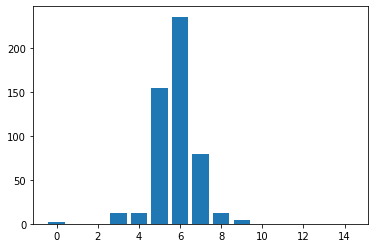

In [48]:
plt.bar(rules.keys(), rules.values())

In [114]:
testsr = LOTHypothesis(grammar=grammar)
testsr.value.depth()

0

In [21]:
rules2 = set()
for _ in range(100000):
    #rule = grammar.generate()
    #log_prob = grammar.log_probability(rule)
    rule2 = LOTHypothesis(grammar=grammar)
    if (rule2.value.depth() > 0):
        rules2.add(rule2)

In [22]:
rarr = list(rules2)

In [23]:
len(rarr)

502

In [24]:
print(rarr)

[lambda x: (x['shape']=='triangle' and x['color']=='green'), lambda x: (x['shape']=='circle' and not (x['color']=='green')), lambda x: (x['shape']=='circle' and x['color']=='blue'), lambda x: (x['color']=='blue' or (x['color']=='red' or (x['shape']=='triangle' and not (x['color']=='red')))), lambda x: (x['shape']=='square' or not (x['shape']=='triangle')), lambda x: (x['shape']=='square' or not (x['shape']=='triangle')), lambda x: not (x['shape']=='square'), lambda x: not (x['shape']=='square'), lambda x: not (x['shape']=='square'), lambda x: (x['shape']=='square' and not (x['shape']=='circle')), lambda x: (x['shape']=='square' and not (x['color']=='red')), lambda x: x['shape']=='triangle', lambda x: x['shape']=='triangle', lambda x: x['shape']=='triangle', lambda x: (not (x['shape']=='square') or (not (x['color']=='blue') or x['shape']=='square')), lambda x: (x['shape']=='triangle' or (x['color']=='blue' or not (x['color']=='red'))), lambda x: (x['color']=='red' and not (x['shape']=='

In [32]:
ra = sample(rarr, 50)

In [33]:
with open('../data/codex_prompts.json', 'w') as out:
    da = []
    for rule in ra:
    
        #num_stimuli = randrange(1, 15)
        #stims = choices(all_stimuli, k=num_stimuli)
        results = apply_rule(rule, all_stimuli)
        data = {}
        data["code"] = str(rule)
        data["stims"] = str(all_stimuli)
        data["results"] = str(results)
        da.append(data)
        #json.dump(data, out)
    out.write(json.dumps(da))
out.close()

In [34]:
f = json.load(open("../data/codex_prompts.json"))

In [35]:
f

[{'code': "lambda x: x['color']=='blue'",
  'stims': "[{'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'red'}, {'shape': 'triangle', 'color': 'red'}, {'shape': 'circle', 'color': 'blue'}, {'shape': 'square', 'color': 'blue'}, {'shape': 'triangle', 'color': 'blue'}, {'shape': 'circle', 'color': 'green'}, {'shape': 'square', 'color': 'green'}, {'shape': 'triangle', 'color': 'green'}]",
  'results': '[False, False, False, True, True, True, False, False, False]'},
 {'code': "lambda x: (not (x['color']=='green') or x['shape']=='square')",
  'stims': "[{'shape': 'circle', 'color': 'red'}, {'shape': 'square', 'color': 'red'}, {'shape': 'triangle', 'color': 'red'}, {'shape': 'circle', 'color': 'blue'}, {'shape': 'square', 'color': 'blue'}, {'shape': 'triangle', 'color': 'blue'}, {'shape': 'circle', 'color': 'green'}, {'shape': 'square', 'color': 'green'}, {'shape': 'triangle', 'color': 'green'}]",
  'results': '[True, True, True, True, True, True, False, True, False]'},
 {'co

In [144]:
data = f[0]

In [145]:
data

{'code': "lambda x: (not (x['shape']=='square') and x['color']=='red')",
 'stims': "[{'shape': 'circle', 'color': 'red'}, {'shape': 'triangle', 'color': 'green'}, {'shape': 'circle', 'color': 'red'}, {'shape': 'circle', 'color': 'blue'}, {'shape': 'square', 'color': 'green'}, {'shape': 'circle', 'color': 'green'}, {'shape': 'circle', 'color': 'green'}]",
 'results': '[True, False, True, False, False, False, False]'}

In [122]:
with open('../data/lotlib_tune.json', 'w') as out:
    da = []
    for rule in rarr:
    

        num_stimuli = randrange(1, 15)
        stims = choices(all_stimuli, k=num_stimuli)
        results = apply_rule(rule, stims)
        prompt = "Create a function that takes in each item in " + str(stims) + " and returns the corresponding item in " + str(results)
        data = {}
        data["code"] = str(rule)
        data["n1"] = prompt
        da.append(data)
        #json.dump(data, out)
    out.write(json.dumps(da))
out.close()

TooBigException: 

# LOTlib3 on Codex Generated Code

In [743]:
data = pd.read_csv("../data/full_output.csv").drop("Unnamed: 0", axis=1)

In [744]:
data

,Problem_num,accuracy,tr_code_concat,gen_code_concat,true_code_size,gen_code_size,num_stims_seen,stims_seen,passed_tests,failed_tests,tr_code_full,gen_code_full,tr_domain,gen_domain,gen_reshaped
0,1,0.555556,True,(color == 'red' or shape == 'circle'),4,37,1,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'square') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ..."
1,1,0.555556,True,(color == 'red' or shape == 'square'),4,37,2,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...","[""assert categorize('blue', 'circle') == True""...","""lambda x: True""","def categorize(color, shape):\n\treturn (color...",9,5,"""lambda x: (x['color'] == 'red' or x['shape'] ..."
2,1,1.000000,True,True,4,4,3,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
3,1,1.000000,True,True,4,4,4,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
4,1,1.000000,True,True,4,4,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == True"",...",[],"""lambda x: True""","def categorize(color, shape):\n\treturn True",9,9,"""lambda x: True"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,133,0.777778,(shape == 'triangle' and color == 'green'),(color == 'blue' and shape == 'square'),42,39,5,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('blue', 'square') == False...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn (color...",1,1,"""lambda x: (x['color'] == 'blue' and x['shape'..."
1193,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,6,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""
1194,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,7,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""
1195,133,0.888889,(shape == 'triangle' and color == 'green'),False,42,5,8,"[{'shape': 'circle', 'color': 'red', 'alpha': ...","[""assert categorize('red', 'circle') == False""...","[""assert categorize('green', 'triangle') == Tr...","""lambda x: (x['shape']=='triangle' and x['colo...","def categorize(color, shape):\n\treturn False",1,0,"""lambda x: False"""


In [745]:
val = grammar.generate(x=eval(data['gen_reshaped'][0]))
type(val)
#mh = LOTHypothesis(grammar = grammar, value = val)

str

In [314]:
LOTlib3.FunctionNode.FunctionNode(returntype='START', name='', parent = None, args = [eval(eval(data['gen_reshaped'][0]))])

TypeError: expected string or bytes-like object

In [510]:
a = grammar.generate()
a

not (x['color'] == 'blue')

In [513]:
a.name

''

In [556]:
eval(data['gen_reshaped'][1])

"lambda x: (x['color'] == 'red' or x['shape'] == 'square')"

In [701]:
eval(data['gen_reshaped'][0])

"lambda x: (x['color'] == 'red' or x['shape'] == 'circle')"

In [700]:
for i in range(len(data['gen_reshaped'])):
    print(data['gen_reshaped'][i])

"lambda x: (x['color'] == 'red' or x['shape'] == 'circle')"
"lambda x: (x['color'] == 'red' or x['shape'] == 'square')"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: (x['color'] == 'red' or x['shape'] == 'square')"
"lambda x: True"
"lambda x: (x['color'] == 'red' or x['color'] == 'blue')"
"lambda x: (x['color'] == 'red' or x['color'] == 'blue')"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: (not x['shape'] == 'triangle')"
"lambda x: True"
"lambda x: (x['color'] == 'red' or x['shape'] == 'square')"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: True"
"lambda x: (not x['color'] == 'green')"
"lambda x: (x['color'] != 'green' or x['shape'] == 'square')"
"lambda x: ((x['color'] == 'green' and x['shape'] == 'square') or (not x['color'] == 'green'))"
"lambda x: True"
"lambda x: (x['color'] == 'red' or x['shape'] == 'square')"
"lambda x: True"
"lambda x: True"
"la

In [514]:
node1 = LOTlib3.FunctionNode.FunctionNode(returntype='SHAPE', name="'circle'", parent= None, args=None)
node2 = LOTlib3.FunctionNode.FunctionNode(returntype='PREDICATE', name="x['shape'] == %s", parent= None, args=[node1])
node7 = LOTlib3.FunctionNode.FunctionNode(returntype='PRE-PREDICATE', name='', parent=None, args=[node2])
node6 = LOTlib3.FunctionNode.FunctionNode(returntype='DISJ', name='', parent=None, args=[node7])
node1.parent = node2
node2.parent=node7
node7.parent=node6

node3 = LOTlib3.FunctionNode.FunctionNode(returntype='COLOR', name="'red'", parent= None, args=None)
node4 = LOTlib3.FunctionNode.FunctionNode(returntype='PREDICATE', name="x['color'] == %s", parent=None, args=[node3])
node5 = LOTlib3.FunctionNode.FunctionNode(returntype='PRE-PREDICATE', name='', parent=None, args=[node4])
node3.parent=node4
node4.parent=node5


node3 = LOTlib3.FunctionNode.FunctionNode(returntype='DISJ', name="(%s or %s)", parent=None, args=[node5, node6])
node5.parent = node3
node6.parent = node3

node8 = LOTlib3.FunctionNode.FunctionNode(returntype='START', name='', parent=None, args=[node3])
node3.parent=node8

In [515]:
node8

(x['color'] == 'red' or x['shape'] == 'circle')

In [523]:
mh = MyHypothesis(value=node8)

In [544]:
mh

lambda x: (x['color'] == 'red' or x['shape'] == 'circle')

In [540]:
example_data2 = [FunctionData(input=[all_stimuli[i]], output=all_results[0][i], alpha=0.999) for i in range(9)]

In [541]:
example_data2

[<{'shape': 'circle', 'color': 'red'} -> True>,
 <{'shape': 'square', 'color': 'red'} -> True>,
 <{'shape': 'triangle', 'color': 'red'} -> True>,
 <{'shape': 'circle', 'color': 'blue'} -> True>,
 <{'shape': 'square', 'color': 'blue'} -> True>,
 <{'shape': 'triangle', 'color': 'blue'} -> True>,
 <{'shape': 'circle', 'color': 'green'} -> True>,
 <{'shape': 'square', 'color': 'green'} -> True>,
 <{'shape': 'triangle', 'color': 'green'} -> True>]

In [542]:
example_top2 = TopN(N=10)
for h2 in MetropolisHastingsSampler(example_hypo, example_data2, steps=1000):
    example_top2 << h2
example_top2 << mh

In [543]:
for h in example_top2:
    print(h)

lambda x: (not (x['shape'] == 'triangle') or (not (x['shape'] == 'circle') or not (x['shape'] == 'circle')))
lambda x: (not (x['shape'] == 'square') or (not (x['shape'] == 'square') or not (x['shape'] == 'circle')))
lambda x: (not (x['shape'] == 'square') or (not (x['shape'] == 'circle') or not (x['shape'] == 'circle')))
lambda x: (not (x['color'] == 'green') or x['color'] == 'green')
lambda x: (not (x['shape'] == 'circle') or x['shape'] == 'circle')
lambda x: (not (x['color'] == 'green') or not (x['color'] == 'red'))
lambda x: (not (x['shape'] == 'circle') or not (x['shape'] == 'square'))
lambda x: (not (x['shape'] == 'triangle') or not (x['shape'] == 'square'))
lambda x: (not (x['shape'] == 'triangle') or x['shape'] == 'triangle')
lambda x: True


In [545]:
mh.likelihood

0.0

In [546]:
mh.posterior_score

-inf

In [553]:
mh.compute_prior()

-8.748304912379627

In [551]:
mh.compute_likelihood(example_data2)

-30.406110463376734

In [555]:
mh.compute_posterior(example_data2)

-39.15441537575636

In [601]:
grammar.pack_ascii(node8)

'06abd5ach'

In [602]:
grammar.unpack_ascii('06abd5ach')

(x['color'] == 'red' or x['shape'] == 'circle')

In [603]:
node8

(x['color'] == 'red' or x['shape'] == 'circle')

In [583]:
test1 = eval(data['gen_reshaped'][0])
test2 = eval(data['gen_reshaped'][0])[10:]

In [596]:
test2

"(x['color'] == 'red' or x['shape'] == 'circle')"

In [647]:
grammar.pack_ascii(node8)

'06abd5ach'

In [649]:
grammar.unpack_ascii('06abd5ach')

(x['color'] == 'red' or x['shape'] == 'circle')

In [703]:
for i in grammar.get_all_rules():
    print(i)

START -> ['DISJ']	w/ p=1.0
START -> ['PRE-PREDICATE']	w/ p=5.0
START -> True	w/ p=5.0
START -> False	w/ p=5.0
DISJ -> ['CONJ']	w/ p=1.0
DISJ -> ['PRE-PREDICATE']	w/ p=5.0
DISJ -> (%s or %s)['PRE-PREDICATE', 'DISJ']	w/ p=1.0
CONJ -> ['PRE-PREDICATE']	w/ p=5.0
CONJ -> (%s and %s)['PRE-PREDICATE', 'CONJ']	w/ p=1.0
PRE-PREDICATE -> not (%s)['PREDICATE']	w/ p=5.0
PRE-PREDICATE -> ['PREDICATE']	w/ p=5.0
PREDICATE -> x['color'] == %s['COLOR']	w/ p=1.0
PREDICATE -> x['shape'] == %s['SHAPE']	w/ p=1.0
COLOR -> 'red'	w/ p=1.0
COLOR -> 'blue'	w/ p=1.0
COLOR -> 'green'	w/ p=1.0
SHAPE -> 'square'	w/ p=1.0
SHAPE -> 'circle'	w/ p=1.0
SHAPE -> 'triangle'	w/ p=1.0


In [632]:
testhyp = MyHypothesis()

In [633]:
testhyp.force_function(eval(eval(data['gen_reshaped'][0])))

In [634]:
eval(eval(data['gen_reshaped'][0]))

<function __main__.<lambda>(x)>

In [639]:
testhyp.compute_likelihood(example_data2)

-30.406110463376734

In [640]:
testhyp.compute_posterior(example_data2)

AttributeError: 'str' object has no attribute 'count_subnodes'

In [641]:
testhyp, mh

(lambda x: <FORCED_FUNCTION>,
 lambda x: (x['color'] == 'red' or x['shape'] == 'circle'))

In [642]:
testhyp.value

'<FORCED_FUNCTION>'

In [737]:
experiment = [str(r) for r in itertools.chain(*[grammar.rules[nt] for nt in list(grammar.rules.keys())])]

In [741]:
experiment

["START -> ['DISJ']\tw/ p=1.0",
 "START -> ['PRE-PREDICATE']\tw/ p=5.0",
 'START -> True\tw/ p=5.0',
 'START -> False\tw/ p=5.0',
 "DISJ -> ['CONJ']\tw/ p=1.0",
 "DISJ -> ['PRE-PREDICATE']\tw/ p=5.0",
 "DISJ -> (%s or %s)['PRE-PREDICATE', 'DISJ']\tw/ p=1.0",
 "CONJ -> ['PRE-PREDICATE']\tw/ p=5.0",
 "CONJ -> (%s and %s)['PRE-PREDICATE', 'CONJ']\tw/ p=1.0",
 "PRE-PREDICATE -> (not (%s))['PREDICATE']\tw/ p=5.0",
 "PRE-PREDICATE -> ['PREDICATE']\tw/ p=5.0",
 "PREDICATE -> x['color'] == %s['COLOR']\tw/ p=1.0",
 "PREDICATE -> x['shape'] == %s['SHAPE']\tw/ p=1.0",
 "COLOR -> 'red'\tw/ p=1.0",
 "COLOR -> 'blue'\tw/ p=1.0",
 "COLOR -> 'green'\tw/ p=1.0",
 "SHAPE -> 'square'\tw/ p=1.0",
 "SHAPE -> 'circle'\tw/ p=1.0",
 "SHAPE -> 'triangle'\tw/ p=1.0"]

In [749]:
grammar.rules

defaultdict(list,
            {'START': [START -> ['DISJ']	w/ p=1.0,
              START -> ['PRE-PREDICATE']	w/ p=5.0,
              START -> True	w/ p=5.0,
              START -> False	w/ p=5.0],
             'DISJ': [DISJ -> ['CONJ']	w/ p=1.0,
              DISJ -> ['PRE-PREDICATE']	w/ p=5.0,
              DISJ -> (%s or %s)['PRE-PREDICATE', 'DISJ']	w/ p=1.0],
             'CONJ': [CONJ -> ['PRE-PREDICATE']	w/ p=5.0,
              CONJ -> (%s and %s)['PRE-PREDICATE', 'CONJ']	w/ p=1.0],
             'PRE-PREDICATE': [PRE-PREDICATE -> (not (%s))['PREDICATE']	w/ p=5.0,
              PRE-PREDICATE -> ['PREDICATE']	w/ p=5.0],
             'PREDICATE': [PREDICATE -> x['color'] == %s['COLOR']	w/ p=1.0,
              PREDICATE -> x['shape'] == %s['SHAPE']	w/ p=1.0],
             'COLOR': [COLOR -> 'red'	w/ p=1.0,
              COLOR -> 'blue'	w/ p=1.0,
              COLOR -> 'green'	w/ p=1.0],
             'SHAPE': [SHAPE -> 'square'	w/ p=1.0,
              SHAPE -> 'circle'	w/ p=1.0,
     

In [751]:
exp_str = eval(data['gen_reshaped'][0])
exp_str

"lambda x: (x['color'] == 'red' or x['shape'] == 'circle')"

In [757]:
exp_str = exp_str[10:]
exp_str

"(x['color'] == 'red' or x['shape'] == 'circle')"

In [764]:
import re

In [765]:
exp_str = exp_str.replace('color', 'colar')

In [769]:
re.split('\(|\)|or|and', exp_str)

['', "x['colar'] == 'red' ", " x['shape'] == 'circle'", '']

In [759]:
startnode = LOTlib3.FunctionNode.FunctionNode(returntype='START', name='', parent=None, args=None)
for i in range(len(exp_str)):
    if exp_str[i] == '(':
        y = i
        nodes = []
        while (exp_str[y] != ')' and y < len(exp_str)):
            y += 1
            

<class 'str'> (
<class 'str'> x
<class 'str'> [
<class 'str'> '
<class 'str'> c
<class 'str'> o
<class 'str'> l
<class 'str'> o
<class 'str'> r
<class 'str'> '
<class 'str'> ]
<class 'str'>  
<class 'str'> =
<class 'str'> =
<class 'str'>  
<class 'str'> '
<class 'str'> r
<class 'str'> e
<class 'str'> d
<class 'str'> '
<class 'str'>  
<class 'str'> o
<class 'str'> r
<class 'str'>  
<class 'str'> x
<class 'str'> [
<class 'str'> '
<class 'str'> s
<class 'str'> h
<class 'str'> a
<class 'str'> p
<class 'str'> e
<class 'str'> '
<class 'str'> ]
<class 'str'>  
<class 'str'> =
<class 'str'> =
<class 'str'>  
<class 'str'> '
<class 'str'> c
<class 'str'> i
<class 'str'> r
<class 'str'> c
<class 'str'> l
<class 'str'> e
<class 'str'> '
<class 'str'> )
